### VOTING ANALYSIS

Data Description:
A sample survey data (Sample Survey.xlsx) is provided for analysis. Samples were collected over a period of nine days where the respondents were asked questions related to elections. Survey weights are in the “weight” column. The description for each column is provided in the excel sheet under tab named “Description”.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1. IMPORTING THE FILE

In [2]:
xls=pd.ExcelFile(r'C:\Users\Aqdus\Downloads\Sample_Survey.xlsx')
survey=pd.read_excel(xls,'Description')
data=pd.read_excel(xls,'Data')

In [3]:
survey

,Column,Description
0,response_id,Unique id for each sample (respondent).
1,collection_date,Date on which the sample was collected.
2,urban_rural,Whether the respodent belongs to a rural or ur...
3,education,The education qualitfication of the repondent
4,income,Income of the respondent.
5,Vote_Now,"If elections are held today, which party will ..."
6,Past_Vote,Which party did the respondent vote for in the...
7,CM_satisfaction,How satisfied is the respondent with the perfo...
8,MLA_satisfaction,How satisfied is the respondent with the perfo...
9,age,The age of the respondent.


In [4]:
data.shape

(6867, 14)

In [5]:
data.head()

,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,Male,176,BC,0.333505


In [6]:
data.describe()

,response_id,assembly_no,weight
count,6867.000000,6867.000000,6867.000000
mean,3434.000000,130.843017,0.995800
std,1982.476482,66.420060,2.074578
min,1.000000,1.000000,0.001089
25%,1717.500000,79.000000,0.137896
50%,3434.000000,135.000000,0.369789
75%,5150.500000,184.000000,0.956474
max,6867.000000,243.000000,51.075631


2. NO. OF SAMPLES COLLECTED EACH DAY

In [7]:
data.value_counts('collection_date')

collection_date
2020-08-24    1479
2020-08-25     998
2020-08-28     761
2020-08-27     665
2020-08-29     620
2020-09-01     607
2020-08-26     598
2020-08-30     582
2020-08-31     557
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   object        
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

In [9]:
data['age']=pd.to_numeric(data['age'])

ValueError: Unable to parse string "24ko" at position 123

In [10]:
data.iloc[123,9]

'24ko'

In [11]:
data.replace(to_replace='24ko',value='24',inplace=True)

In [12]:
data['age']=pd.to_numeric(data['age'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6867 entries, 0 to 6866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   response_id       6867 non-null   int64         
 1   collection_date   6867 non-null   datetime64[ns]
 2   urban_rural       6867 non-null   object        
 3   education         6867 non-null   object        
 4   income            6867 non-null   object        
 5   Vote_Now          6867 non-null   object        
 6   Past_Vote         6867 non-null   object        
 7   CM_satisfaction   6867 non-null   object        
 8   MLA_satisfaction  6867 non-null   object        
 9   age               6867 non-null   int64         
 10  gender            6867 non-null   object        
 11  assembly_no       6867 non-null   int64         
 12  category          6867 non-null   object        
 13  weight            6867 non-null   float64       
dtypes: datetime64[ns](1), fl

3. FINDING OUT THE PROPORTION AGED BELOW 45

In [13]:
print(data[data['age']<45].shape[0]/data.shape[0])

0.9318479685452162


4. INSERTING A NEW COLUMN AND CREATING BINS

In [14]:
data.insert(10,'age_group',np.nan)
criteria=[data['age'].between(18,25),data['age'].between(25,40),data['age'].between(40,55),data['age'].between(55,100)]
values=['18-25','25-40','40-55','55+']
data['age_group']=np.select(criteria,values,0)
data.head()


,response_id,collection_date,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,2020-08-24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-40,Male,211,Gen,0.346969
1,2,2020-08-24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-40,Male,189,BC,0.603419
2,3,2020-08-24,Rural,Graduate,"₹ 5,000 - ₹ 10,000",JAP(L),BJP,Fully Dissatisfied,Somewhat Satisfied,25,18-25,Male,191,Gen,0.673762
3,4,2020-08-24,Urban,Graduate,"₹ 10,000 - ₹ 20,000",RJD,RJD,Fully Dissatisfied,Somewhat Satisfied,36,25-40,Male,194,Gen,1.101298
4,5,2020-08-24,Rural,Graduate,"₹ 50,000 - ₹ 80,000",JD(U),Did not vote,Fully Satisfied,Fully Satisfied,22,18-25,Male,176,BC,0.333505


5. NOTING DOWN THE TOTAL NUMBER OF SAMPLES COLLECTED FROM EACH AGE GROUP

In [15]:
data['age_group'].value_counts()

25-40    3423
18-25    2692
40-55     644
55+       108
Name: age_group, dtype: int64

6. PROPORTION OPTING FOR RJD IN BOTH PAST VOTE AND VOTE NOW COLUMNS

In [16]:
print(data[(data['Vote_Now']=='RJD')&(data['Past_Vote']=='RJD')].shape[0]/data.shape[0])

0.1181010630551915


7. PROPORTION GROUPED BY DAYS, FULLY SATISFIED BY THE CM

In [17]:
print(data[data['CM_satisfaction']=='Fully Satisfied'].groupby('collection_date')['CM_satisfaction'].count()/data.groupby('collection_date')['CM_satisfaction'].count())

collection_date
2020-08-24    0.098715
2020-08-25    0.095190
2020-08-26    0.098662
2020-08-27    0.081203
2020-08-28    0.120894
2020-08-29    0.117742
2020-08-30    0.111684
2020-08-31    0.111311
2020-09-01    0.123558
Name: CM_satisfaction, dtype: float64


8. FULLY DISSATISFIED BY CM RESPONSES VISUALIZED OVER CONSECUTIVE DAYS

  collection_date  CM_satisfaction
0      2020-08-24         0.434077
1      2020-08-25         0.433868
2      2020-08-26         0.431438
3      2020-08-27         0.442105
4      2020-08-28         0.458607
5      2020-08-29         0.456452
6      2020-08-30         0.429553
7      2020-08-31         0.450628
8      2020-09-01         0.415157


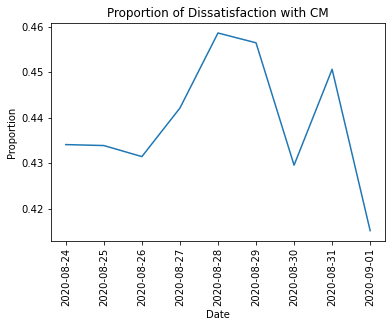

In [18]:
diss=pd.DataFrame(data[data['CM_satisfaction']=='Fully Dissatisfied'].groupby('collection_date')['CM_satisfaction'].count()/data.groupby('collection_date')['CM_satisfaction'].count())
diss.reset_index(inplace=True)
print(diss)
plt.plot(diss['collection_date'],diss['CM_satisfaction'])
plt.title('Proportion of Dissatisfaction with CM')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.show()

9. MAKING A PIVOT TABLE FOR COUNT OF PAST VOTE VS VOTE NOW

In [19]:
data.pivot_table(index='Past_Vote',values='Vote_Now',aggfunc='count')

,Vote_Now
Past_Vote,
BJP,2823
BSP,9
Did not vote,804
HAM,50
INC,213
JAP(L),42
JD(U),1374
LJP,125
Left Front,30


10. MAKING A PIVOT TABLE FOR THE SUM OF WEIGHTS

In [20]:
data.pivot_table(index='Past_Vote',values='weight',aggfunc='sum')

,weight
Past_Vote,
BJP,1819.705752
BSP,41.137719
Did not vote,565.582563
HAM,42.110354
INC,429.978586
JAP(L),69.749576
JD(U),1873.120263
LJP,192.112418
Left Front,68.229827


11. CREATING A DATAFRAME FOR THE TOTAL COUNT IN EACH AGE GROUP

In [21]:
df1=pd.DataFrame(data['age_group'].value_counts())
df1.reset_index(inplace=True)
df1.columns=['age_group','Total Count']
df1.head()

,age_group,Total Count
0,25-40,3423
1,18-25,2692
2,40-55,644
3,55+,108


12. CREATING A DATAFRAME FOR INDIVIDUALS IN EACH AGE GROUP WHO VOTED FOR JD(U)

In [22]:
df2=pd.DataFrame(data[data['Vote_Now']=='JD(U)'].groupby('age_group')['Vote_Now'].count())
df2.reset_index(inplace=True)
df2.columns=['age_group','Count for JD(U)']
df2.head()

,age_group,Count for JD(U)
0,18-25,216
1,25-40,245
2,40-55,55
3,55+,10


13. MERGING OF DATAFRAMES ON A COMMON AGE GROUP

In [23]:
merged=pd.merge(left=df1,right=df2,left_on='age_group',right_on='age_group')
merged

,age_group,Total Count,Count for JD(U)
0,25-40,3423,245
1,18-25,2692,216
2,40-55,644,55
3,55+,108,10
